# GRAPHICAL  PARAMETERS 

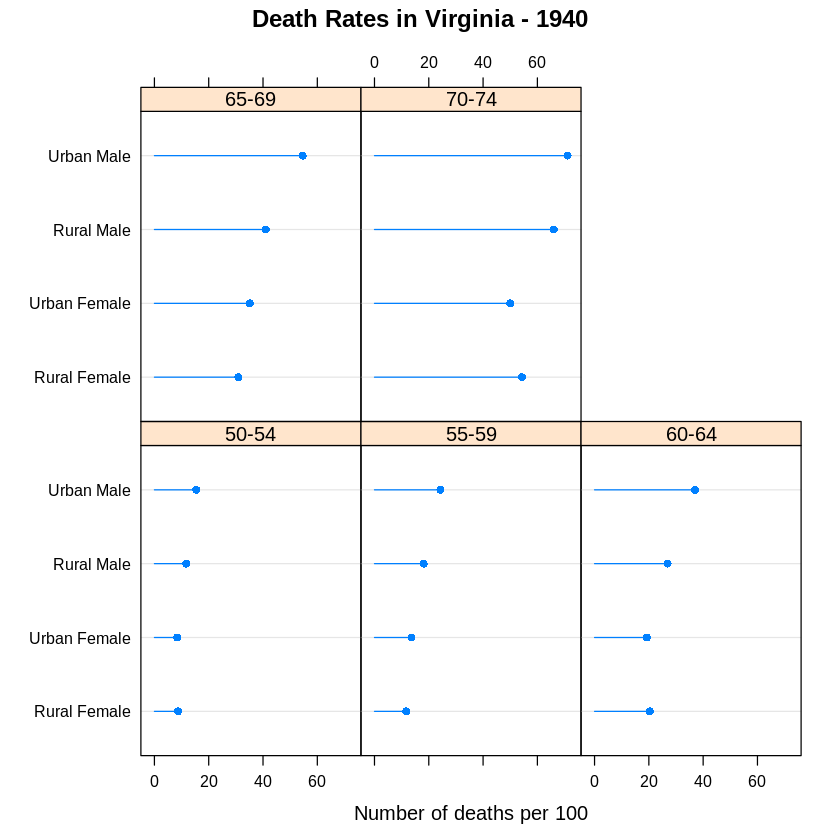

In [7]:
library("lattice")
# Dot Plot of Death Rates in Virginia
vad.plot <- dotplot(reorder(Var2, Freq) ~ Freq | Var1, 
                    data = as.data.frame.table(VADeaths), 
                    origin = 0, type = c("p", "h"), 
                    main = "Death Rates in Virginia - 1940", 
                    xlab = "Number of deaths per 100") 
vad.plot 

In [8]:
str(vad.plot)

List of 45
 $ formula          :Class 'formula'  language reorder(Var2, Freq) ~ Freq | Var1
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 $ as.table         : logi FALSE
 $ aspect.fill      : logi TRUE
 $ legend           : NULL
 $ panel            : chr "panel.dotplot"
 $ page             : NULL
 $ layout           : NULL
 $ skip             : logi FALSE
 $ strip            : chr "strip.default"
 $ strip.left       : logi FALSE
 $ xscale.components:function (lim, packet.number = 0, packet.list = NULL, top = TRUE, ...)  
 $ yscale.components:function (lim, packet.number = 0, packet.list = NULL, right = TRUE, ...)  
 $ axis             :function (side = c("top", "bottom", "left", "right"), scales, components, 
    as.table, labels = c("default", "yes", "no"), ticks = c("default", 
        "yes", "no"), ..., prefix = lattice.getStatus("current.prefix"))  
 $ xlab             : chr "Number of deaths per 100"
 $ ylab             : NULL
 $ xlab.default     : chr "Freq"
 $ yl

In [10]:
# Absolute rates encoded by line dropping to origin
# Look at structure
dot.line.settings <- trellis.par.get("dot.line") 
str(dot.line.settings) 

List of 4
 $ alpha: num 1
 $ col  : chr "#e6e6e6"
 $ lty  : num 1
 $ lwd  : num 1


In [13]:
# We make reference lines transparent
dot.line.settings$col <- "transparent" 
trellis.par.set("dot.line", dot.line.settings) 
# What are the line settings?
plot.line.settings <- trellis.par.get("plot.line") 
str(plot.line.settings) 

List of 4
 $ alpha: num 1
 $ col  : chr "#0080ff"
 $ lty  : num 1
 $ lwd  : num 1


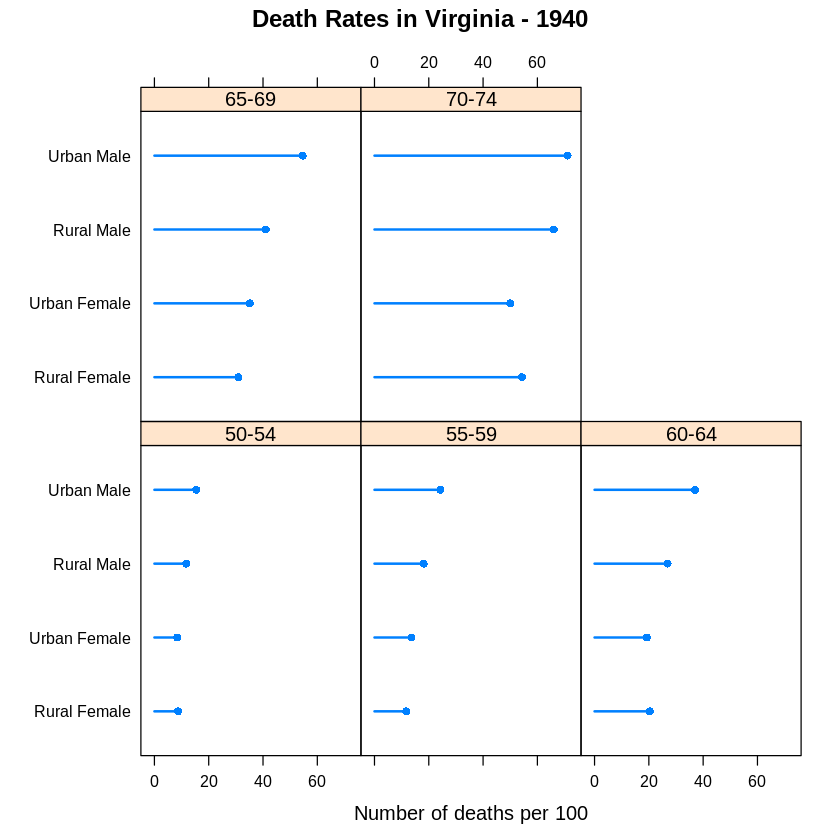

In [14]:
# Double the thickness of the lines
plot.line.settings$lwd <- 2 
trellis.par.set("plot.line", plot.line.settings) 

# Replot
vad.plot 

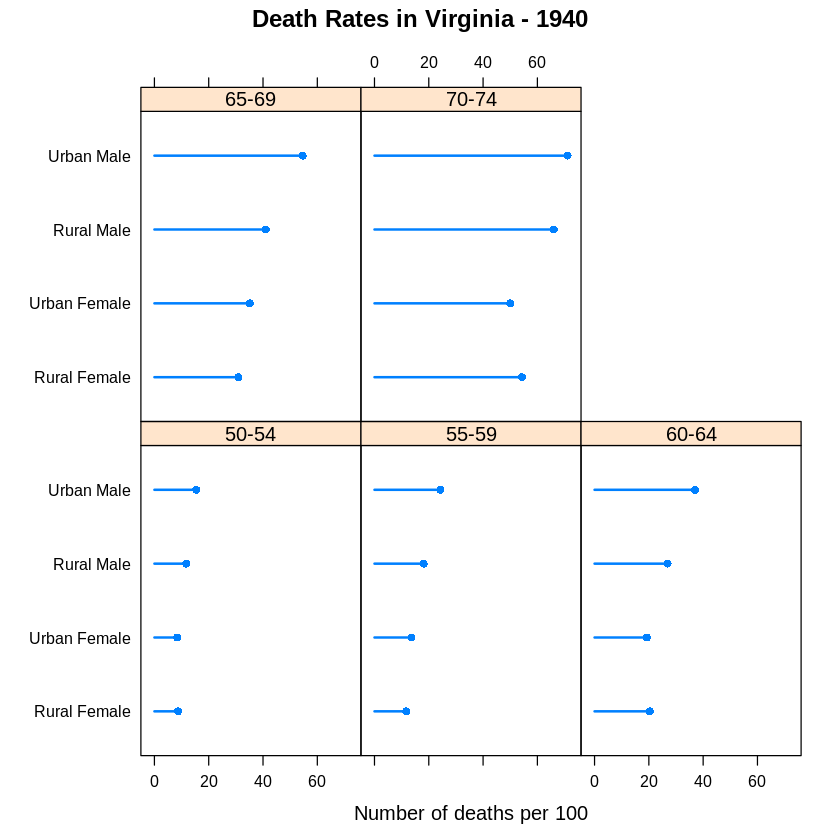

In [15]:
# Or can plot last object to redraw original
plot(trellis.last.object()) 

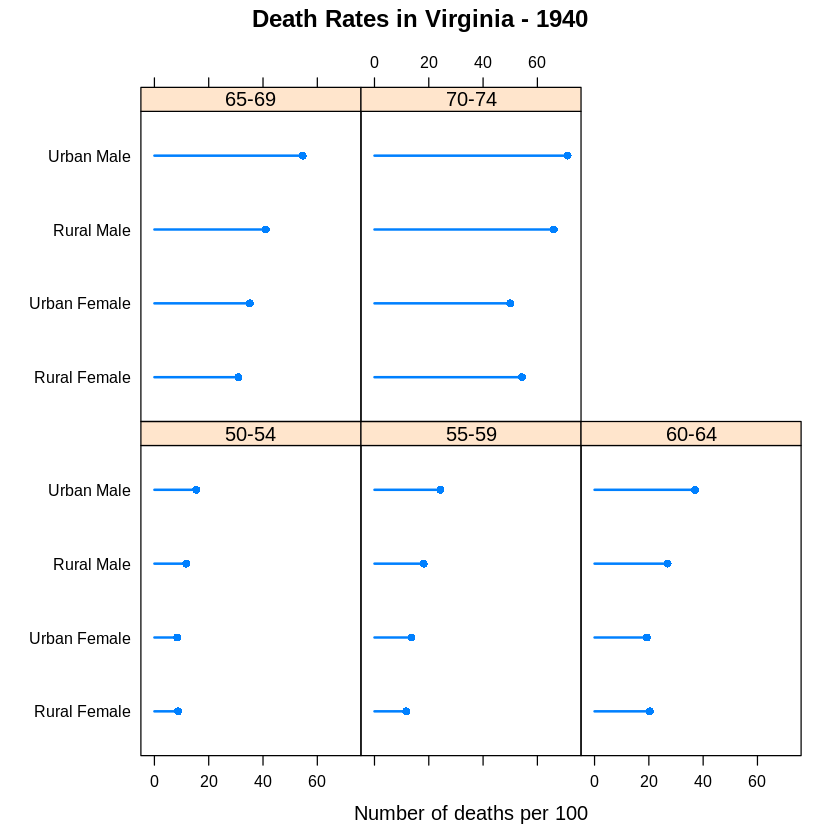

In [16]:
# Or you could modify by writing your own panel function
# Not really necessary here, but shows how theme
# parameters can provide defaults in a panel function
panel.dotline <- 
  function(x, y, 
           col = dot.symbol$col, pch = dot.symbol$pch, 
           cex = dot.symbol$cex, alpha = dot.symbol$alpha, 
           col.line = plot.line$col, lty = plot.line$lty, 
           lwd = plot.line$lwd, alpha.line = plot.line$alpha, 
           ...) 
  { 
    dot.symbol <- trellis.par.get("dot.symbol") 
    plot.line <- trellis.par.get("plot.line") 
    panel.segments(0, y, x, y, col = col.line, lty = lty, 
                   lwd = lwd, alpha = alpha.line) 
    panel.points(x, y, col = col, pch = pch, 
                 cex = cex, alpha = alpha) 
  } 

# Now we can use this panel function
update(vad.plot, panel = panel.dotline)

In [17]:
# Can set more than one parameter at a time
# The two earlier trellis.par.set calls can
# be replaced with a single call
trellis.par.set(dot.line = dot.line.settings, 
                plot.line = plot.line.settings) 

# Really, only components being modified
# need to be supplied:
trellis.par.set(dot.line = list(col = "transparent"), 
                plot.line = list(lwd = 2)) 

# Or can supply any number of parameters together
# as a list:
trellis.par.set(list(dot.line = list(col = "transparent"), 
                     plot.line = list(lwd = 2))) 

# Available graphical parameters
names(trellis.par.get())

[1] "grid.pars"         "fontsize"          "background"       
 [4] "panel.background"  "clip"              "add.line"         
 [7] "add.text"          "plot.polygon"      "box.dot"          
[10] "box.rectangle"     "box.umbrella"      "dot.line"         
[13] "dot.symbol"        "plot.line"         "plot.symbol"      
[16] "reference.line"    "strip.background"  "strip.shingle"    
[19] "strip.border"      "superpose.line"    "superpose.symbol" 
[22] "superpose.polygon" "regions"           "shade.colors"     
[25] "axis.line"         "axis.text"         "axis.components"  
[28] "layout.heights"    "layout.widths"     "box.3d"           
[31] "par.xlab.text"     "par.ylab.text"     "par.zlab.text"    
[34] "par.main.text"     "par.sub.text"

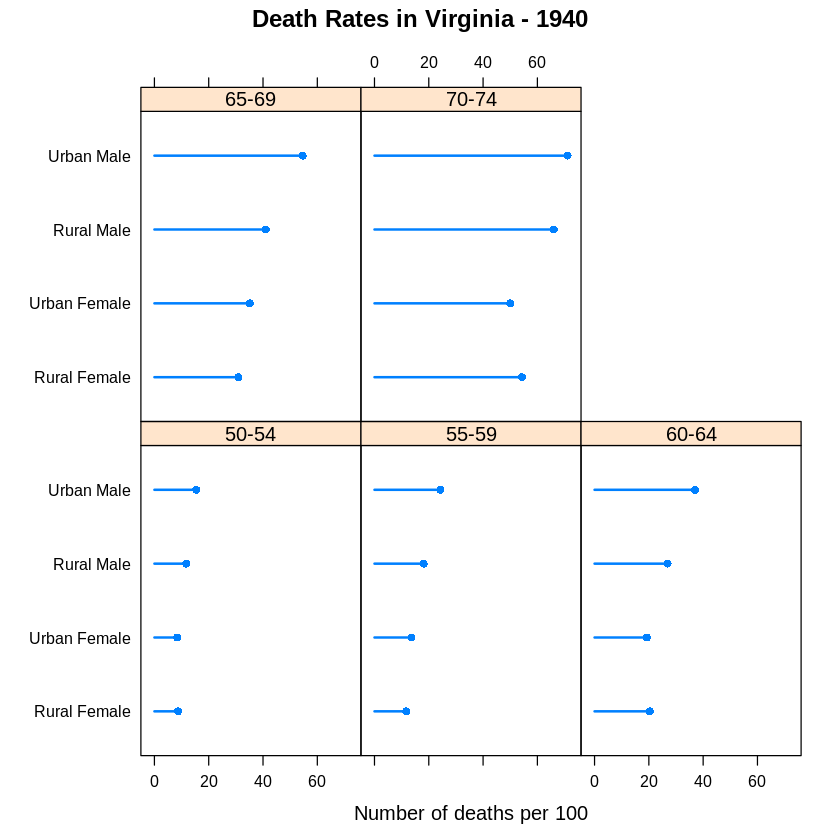

In [21]:
# The par.settings argument
# Can recreate earlier figure with or without
# the earlier calls to trellis.par.set()
update(vad.plot, 
       par.settings = list(dot.line = list(col = "transparent"),
                           plot.line = list(lwd = 2)))

The standard graphical settings at the time
Sarkar's book was published

`levelplot(t(ans), colorkey = FALSE, 
          scales = list(x = list(rot = 90)),
          panel = function(x, y, z, ...) {
            panel.abline(v = unique(as.numeric(x)), 
                         h = unique(as.numeric(y)), 
                         col = "darkgrey")
            panel.xyplot(x, y, pch = 16 * z, ...)
          },
          xlab = "Graphical parameters", 
          ylab = "Setting names")`

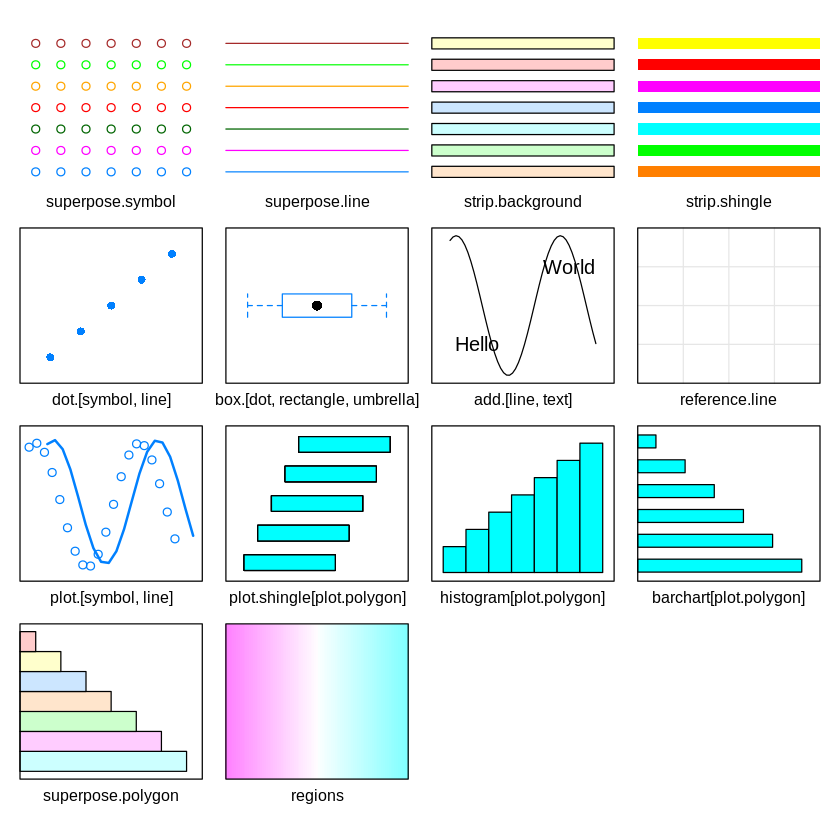

In [23]:
# A graphical summary of black and white theme used
# in Sarkar's book
show.settings() 